# STA130 TUT 11 (Nov15)<br><br> 🌳🌲 <u>Decision Tree Classification <br>with _sklearn_ and confusion matrices<u>


## ♻️ 📚 Review  / Questions [30 minutes]

### 1. **[15 of the 30 minutes]** Follow up clarification questions regarding **multiple linear regression**?  Which **classification** introduced today builds directly upon...

> 1. How are **predictors variables** used to **predict** an **outcome variable**? E.g.,
>
>    $$Y_i = \beta_0 + \beta_1x_i + \beta_2 1_{B}(k_i) + \beta_3 1_{C}(k_i) + \beta_4x_i1_{B}(k_i) + \beta_5 1_{B}(k_i)1_{C}(k_i) + \beta_6x_i^2$$
>
>
> 2. What's the difference between **predictive performance** and **coefficient hypothesis testing** using p-values?
> 3. Can **R-squared** ever get worse with each additional predictor variable added to the model?

### 2. **[15 of the 30 minutes]** **Train-Test** "in sample" versus "out of sample" validation


In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [2]:
cancer_data = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_data.data,
                         columns=cancer_data.feature_names)

In [3]:
# Notice the binary 'target'
# with 'target_names': array(['malignant', 'benign'], dtype='<U9')
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

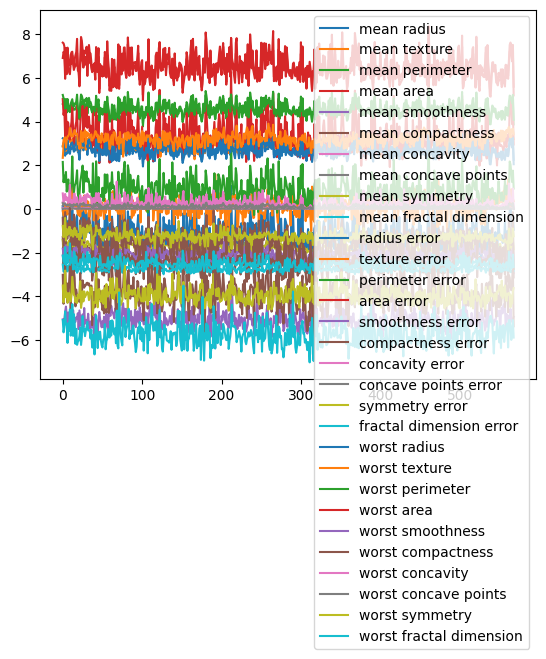

In [5]:
import matplotlib.pyplot as plt
for i in cancer_df:
    if all(cancer_df[i]>0):
        cancer_df[i]=np.log(cancer_df[i])

_ = cancer_df.plot()

In [6]:
# Randomly split into 50% training data and 50% testing data
# Why?
np.random.seed(130)
training_indices = cancer_df.sample(frac=0.5, replace=False).index.sort_values()
testing_indices = cancer_df.index[~cancer_df.index.isin(training_indices)]

In [7]:
# Recall the binary 'target'
# But notice here the outcome variable is continuous (not binary)
# (and same for the predictor variables, binary 'target' not used)
linear_spec_4 = '''
scale(Q('mean area')) ~ scale(Q('texture error')) + scale(Q('smoothness error'))
                      + scale(Q('mean fractal dimension')) + scale(Q('mean smoothness'))
                      + scale(Q('mean symmetry')) * scale(Q('area error'))
                      * scale(Q('worst texture'))
                      * scale(Q('worst smoothness'))
                      * scale(Q('worst symmetry'))
                      * scale(Q('worst concave points'))
                      * scale(Q('worst compactness'))
                      * scale(Q('worst concavity'))
'''

linear_spec_3 = '''
scale(Q('mean area')) ~ scale(Q('texture error')) * scale(Q('smoothness error'))
                      * scale(Q('mean fractal dimension')) * scale(Q('mean smoothness'))
                      * scale(Q('mean symmetry'))
'''

linear_spec_2 = '''
scale(Q('mean area')) ~ scale(Q('texture error')) + scale(Q('smoothness error'))
                      + scale(Q('mean fractal dimension')) + scale(Q('mean smoothness'))
                      + scale(Q('mean symmetry'))
'''
linear_spec_1 = '''
scale(Q('mean area')) ~ scale(Q('texture error')) + scale(Q('smoothness error'))
'''
MLR = smf.ols(linear_spec_3, data=cancer_df.loc[training_indices,:])
MLR_fit = MLR.fit() # Fit the mulitple lienar regression model (MLR)


In [8]:
# "In sample" performance based on the "training data"
np.corrcoef(MLR_fit.predict(cancer_df.loc[training_indices,:]),
            cancer_df.loc[training_indices,"mean area"])[0,1]**2

0.5009341106158757

In [9]:
# "Out of sample" performance based on the "testing data"
# Why?
np.corrcoef(MLR_fit.predict(cancer_df.loc[testing_indices,:]),
            cancer_df.loc[testing_indices,"mean area"])[0,1]**2

0.3428936615687016

### Why is the "in sample" performance better than the "out of sample" performance?

This behavior is common in regression models and can be explained by **overfitting** and **model complexity**.

1. **In Sample vs. Out of Sample Performance:**
   - **In Sample Performance:** The R-squared value calculated on the training data often appears high because the model is fit directly to this data. The model parameters are chosen to minimize the residual error on this data.
   - **Out of Sample Performance:** The R-squared value on the testing data is usually lower because this data was not used to train the model. It represents the model's ability to generalize to new, unseen data.

2. **Overfitting:**
   - When a model is too complex (like in `linear_spec_3` or `linear_spec_4`), it can fit the noise in the training data rather than capturing the true underlying relationships. This results in very high performance on the training data (in sample) but poor performance on the testing data (out of sample).
   - This is why `linear_spec_4` shows a significant drop in out-of-sample performance: the model includes many interactions and features, making it prone to overfitting.

3. **Underfitting vs. Good Fit vs. Overfitting:**
   - **Underfitting (e.g., `linear_spec_1`):** The model is too simple, and both in-sample and out-of-sample performance may be poor.
   - **Good Fit (e.g., `linear_spec_2`):** The model captures the true relationships without overfitting, so the in-sample and out-of-sample R-squared values are close.
   - **Overfitting (e.g., `linear_spec_3` and `linear_spec_4`):** The model fits the training data very well but performs poorly on new data.

### Why might both the in-sample performance be better and the out-of-sample performance improve with a simpler model?

- **Simpler Models Generalize Better:** Simpler models (like `linear_spec_1` and `linear_spec_2`) are less likely to capture noise in the training data and therefore generalize better to new data.
- **Bias-Variance Tradeoff:** Increasing model complexity decreases bias but increases variance. Simplifying the model reduces variance and can improve generalization.

### Code Example: Comparing R-squared for Different Models

Here’s how you can compare in-sample and out-of-sample R-squared values for each model specification:



In [14]:
import statsmodels.formula.api as smf
import numpy as np

# Fit and evaluate linear_spec_1
MLR_1 = smf.ols(linear_spec_1, data=cancer_df.loc[training_indices, :]).fit()
R2_in_1 = np.corrcoef(MLR_1.predict(cancer_df.loc[training_indices, :]),
                      cancer_df.loc[training_indices, "mean area"])[0, 1]**2
R2_out_1 = np.corrcoef(MLR_1.predict(cancer_df.loc[testing_indices, :]),
                       cancer_df.loc[testing_indices, "mean area"])[0, 1]**2
print(f"linear_spec_1: R2_in = {R2_in_1:.3f}, R2_out = {R2_out_1:.3f}")

# Fit and evaluate linear_spec_2
MLR_2 = smf.ols(linear_spec_2, data=cancer_df.loc[training_indices, :]).fit()
R2_in_2 = np.corrcoef(MLR_2.predict(cancer_df.loc[training_indices, :]),
                      cancer_df.loc[training_indices, "mean area"])[0, 1]**2
R2_out_2 = np.corrcoef(MLR_2.predict(cancer_df.loc[testing_indices, :]),
                       cancer_df.loc[testing_indices, "mean area"])[0, 1]**2
print(f"linear_spec_2: R2_in = {R2_in_2:.3f}, R2_out = {R2_out_2:.3f}")

# Fit and evaluate linear_spec_3
MLR_3 = smf.ols(linear_spec_3, data=cancer_df.loc[training_indices, :]).fit()
R2_in_3 = np.corrcoef(MLR_3.predict(cancer_df.loc[training_indices, :]),
                      cancer_df.loc[training_indices, "mean area"])[0, 1]**2
R2_out_3 = np.corrcoef(MLR_3.predict(cancer_df.loc[testing_indices, :]),
                       cancer_df.loc[testing_indices, "mean area"])[0, 1]**2
print(f"linear_spec_3: R2_in = {R2_in_3:.3f}, R2_out = {R2_out_3:.3f}")

# Fit and evaluate linear_spec_4
MLR_4 = smf.ols(linear_spec_4, data=cancer_df.loc[training_indices, :]).fit()
R2_in_4 = np.corrcoef(MLR_4.predict(cancer_df.loc[training_indices, :]),
                      cancer_df.loc[training_indices, "mean area"])[0, 1]**2
R2_out_4 = np.corrcoef(MLR_4.predict(cancer_df.loc[testing_indices, :]),
                       cancer_df.loc[testing_indices, "mean area"])[0, 1]**2
print(f"linear_spec_4: R2_in = {R2_in_4:.3f}, R2_out = {R2_out_4:.3f}")



linear_spec_1: R2_in = 0.114, R2_out = 0.059
linear_spec_2: R2_in = 0.423, R2_out = 0.377
linear_spec_3: R2_in = 0.501, R2_out = 0.343
linear_spec_4: R2_in = 0.993, R2_out = 0.048


### Interpretation of Results:

- If $ R^2_{in} \gg R^2_{out} $, the model likely overfits.
- If $ R^2_{in} \approx R^2_{out} $, the model generalizes well.
- Increasing complexity usually increases \( R^2_{in} \) but may decrease \( R^2_{out} \).

This exercise demonstrates the importance of evaluating both in-sample and out-of-sample performance to understand a model's ability to generalize to unseen data.

- `linear_spec_1`: The model fit as evaluated by R-squared the "proportion of variation explained" is better for data the model was trained on and worse for new data
    - Why might this be expected?  What explains this?


- `linear_spec_2`: The "in sample" performance remains better compared to the "out of sample" performance, but overall performance is improved and relatively speaking the "out of sample" performance
    - Why might both of these be expected?  What explains these?


- `linear_spec_3`: something has gone wrong
    - `linear_spec_4`: something has gone very wrong


- When "out of sample" predictive "proportion of variation explained" performance is not much worse than the "in sample" performance, then this suggests that the model seems to represent the data fairly well...
    - Why?




## 🚧 🏗️ Demo (Introducing Classification Decision Trees and Confusion Matrices) [30 minutes]

### 1. **[12 of the 30 minutes]** The concept of a *classification decision tree*

Some questions to keep in mind (and hopefully answer) as you go

- What's similar about this code and the **multiple linear regression code** above?
- A **classification decision tree** is a model like **multiple linear regression**... how so?
- **Predictions** of **classification decision tree** are made differently than those of **multiple linear regression**... how so?


In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Specify outcome and "Design Matrix"
# y ~ col1 + col2 + ... + colk
clf.fit(X=cancer_df.iloc[training_indices, :],
        y=cancer_data.target[training_indices])
# The outcome has changed compared to the earlier multiple linear regression model...

DecisionTreeClassifier(max_depth=2, random_state=42)

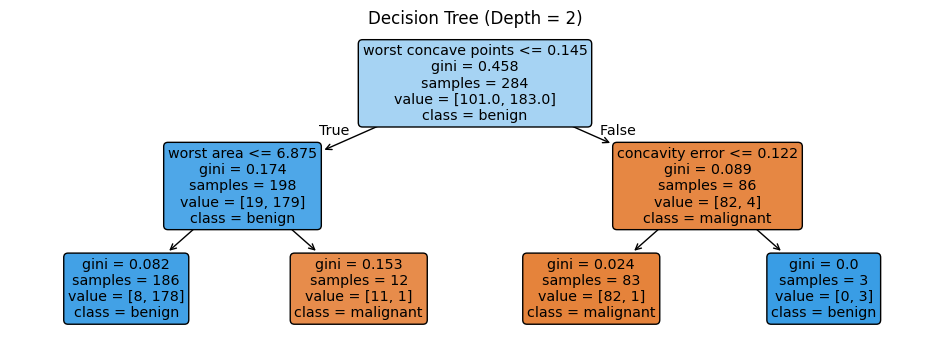

In [11]:
# Details regarding code are not the point and will be discused and explore later in LEC

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plot_tree(clf, feature_names=cancer_data.feature_names.tolist(),
          class_names=cancer_data.target_names.tolist(),
          filled=True, rounded=True)
plt.title("Decision Tree (Depth = 2)")
plt.show()

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
# Make predictions on both training and testing data
y_pred_train = clf.predict(cancer_df.iloc[training_indices, :])
y_pred_test = clf.predict(cancer_df.iloc[testing_indices, :])

# Calculate accuracy for training and testing data
accuracy_train = accuracy_score(cancer_data.target[training_indices], y_pred_train)
accuracy_test = accuracy_score(cancer_data.target[testing_indices], y_pred_test)

print(f"Decision Tree Accuracy (Train): {accuracy_train:.2f}")
print(f"Decision Tree Accuracy (Test): {accuracy_test:.2f}")

Decision Tree Accuracy (Train): 0.37
Decision Tree Accuracy (Test): 0.39


### **Classification Decision Tree vs. Multiple Linear Regression**


#### 1. **What's similar about this code and the multiple linear regression code above?**

**Similarities:**
- **Model Fitting:** Both the decision tree and multiple linear regression involve splitting the data into **training and testing** sets, fitting the model on the training data, and then making predictions.
- **Evaluation:** Both models use performance metrics to evaluate how well the model fits the data (e.g., \( R^2 \) for regression, accuracy for classification).
- **Features and Outcome:** Both models use **predictor variables** (features) to predict an **outcome variable**. In multiple linear regression, the outcome is **continuous**, while in a classification decision tree, the outcome is **categorical** (e.g., "malignant" or "benign").

#### 2. **A classification decision tree is a model like multiple linear regression... how so?**

**Similarities:**
- **Data Structure:** Both models take input data with features (predictors) and an outcome (target) to learn the relationship between them.
- **Model Training:** Both models find patterns in the training data to make predictions. In regression, it’s finding a **best-fit line**; in a decision tree, it’s finding the **best splits** of the data based on feature values.
- **Interpretability:** Both models can be interpreted. Multiple linear regression uses coefficients (\(\beta\) values), while decision trees use **splits** and **decision rules**.

#### 3. **Predictions of a classification decision tree are made differently than those of multiple linear regression... how so?**

**Differences:**
- **Prediction Method:**
  - In **multiple linear regression**, the prediction is a **numeric value** calculated as:
    $$\hat{Y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$$
    This value is a continuous number, which represents the expected outcome given the features.
  - In a **classification decision tree**, the prediction is made by **traversing the tree** based on the feature values, following the decision rules at each node, until a **leaf node** is reached. The prediction is the **class label** (e.g., "malignant" or "benign") of that leaf node.

- **Output Type:**
  - Multiple linear regression predicts a **continuous numeric value** (e.g., price, weight).
  - A classification decision tree predicts a **categorical class label** (e.g., "yes" or "no", "A" or "B").

- **Model Form:**
  - Multiple linear regression is a **linear model**, assuming a straight-line relationship between predictors and the outcome.
  - A decision tree is a **non-linear model**, allowing for more complex relationships by making splits in the feature space.



#### **Summary:**
- The **decision tree classifier** learns to make decisions based on feature splits.
- The **accuracy score** tells us how well the model performs on the testing data.

This example shows the similarities and differences in **fitting**, **predicting**, and **evaluating** a decision tree model compared to multiple linear regression.

###  2. **[18 of the 30 minutes]** The **concept** of confusion matrix...

> Details regarding code are not the point and will be discused and explore later in LEC

Some questions to keep in mind (and hopefully answer) as you go

- **Classification** and **regression** are distinguised by the nature of the **outcome variables** they predict... How so?
- What should be similar about **model performance evaluation** for **classification decision tree** to what we've seen previously?
- Are multiple kinds of **model performance evaluation metrics** possible for **classification decision tree** based on the **confusion matrix**?


In [12]:
# Make Benign 0 and Malignant 1
# JUST RUN THIS ONCE!!
cancer_data.target = 1-cancer_data.target
cancer_data.target_names = np.array(['Benign\n(negative)','Malignant\n(positive)'])

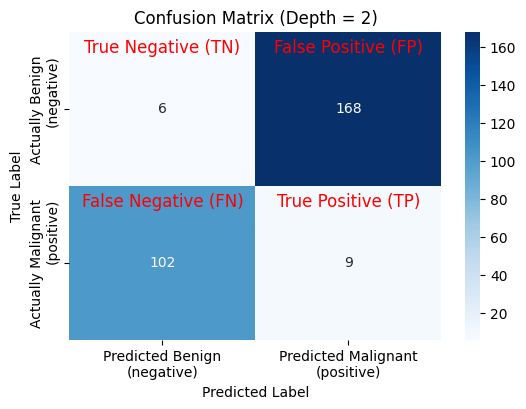

In [13]:
# Details regarding code are not the point and will be discused and explored later in LEC

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred_depth_2 = clf.predict(cancer_df.iloc[testing_indices, :])

# Generate the confusion matrix
conf_matrix = confusion_matrix(cancer_data.target[testing_indices], y_pred_depth_2)

# Get the target names for 'benign' and 'malignant'
target_names = cancer_data.target_names.tolist()

# Set up a confusion matrix with proper labels using target names
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {label}' for label in target_names],
            yticklabels=[f'Actually {label}' for label in target_names])

plt.title('Confusion Matrix (Depth = 2)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add custom labels for FP, FN, TP, and TN
plt.text(0.5, 0.1, "True Negative (TN)", fontsize=12, color='red', ha='center', va='center')
plt.text(1.5, 0.1, "False Positive (FP)", fontsize=12, color='red', ha='center', va='center')
plt.text(0.5, 1.1, "False Negative (FN)", fontsize=12, color='red', ha='center', va='center')
plt.text(1.5, 1.1, "True Positive (TP)", fontsize=12, color='red', ha='center', va='center')

plt.show()

### Answering the Questions:

1. **Classification vs. Regression: How are they distinguished by the nature of outcome variables?**
   - **Classification** predicts **categorical** (discrete) outcome variables (e.g., class labels like "malignant" or "benign").
   - **Regression** predicts **continuous** (numeric) outcome variables (e.g., a numerical score or measurement).
   - Example: In the breast cancer dataset:
     - **Classification:** The model predicts whether a tumor is "malignant" or "benign" (categorical).
     - **Regression:** The model predicts a continuous value, such as the "mean area" of the tumor.

2. **What should be similar about model performance evaluation for classification decision tree and previous models?**
   - Both classification and regression models can be evaluated using **in-sample** and **out-of-sample** (or train-test) **performance metrics**.
   - In regression, we often use metrics like **R-squared**, **MSE**, or **RMSE** to assess how well the model fits the data.
   - In classification, we use metrics derived from the **confusion matrix**, such as **accuracy**, **precision**, **recall**, and **F1-score**, to evaluate how well the model classifies the observations.

3. **Are multiple kinds of model performance evaluation metrics possible for classification decision tree based on the confusion matrix?**
   - Yes, the confusion matrix provides a variety of metrics for evaluating classification performance:
     - **Accuracy:** The overall proportion of correctly classified instances.
     - **Precision:** The proportion of true positives among all predicted positives.
     - **Recall (Sensitivity):** The proportion of true positives among all actual positives.
     - **F1-score:** The harmonic mean of precision and recall, providing a balance between the two.
     - **Specificity:** The proportion of true negatives among all actual negatives.



## 💬 🗣️ Communication Activity **[40 minutes]**

1. **[7 minutes]** Break into your **course project groups** and confer regarding the purpose of the **train-test** "in sample versus out-of-sample" **validation** framework.


2. **[6 minutes]** Identify an answer to the previous question which all groups in agreement are as close to unanimously satisfied with as possible (in the allotted time).


3. **[7 minutes]** Have two group provide an example scenario in which the implications of **Type I errors** (wrongly rejecting the **null hypothesis**) and **Type II errors** (failing to reject a **false null hypothesis**) can be demonstrated.


4. **[8 minutes]** Have to other groups provide an example context involving **predictions** using a **classification decision tree** in which the implications of **false positive (FP)** and **false negative (FP) predictions** can be discussed and considered.


5. **[6 minutes]** Lead a discussion with all groups exploring the analogy (and distinction) between **Type I/Type II errors** and **false positive/negative (FP/FN) predictions**.


6. **[6 minutes]** Lead a discussion with all groups exploring what they believe the  meaningfulness, purpose, or relevance of the **train-test** "in sample versus out-of-sample" **validation** framework is relative to the **errors** considered here.


7. If time permits, explore with all the groups whether or not they have identified any notion of a difference between the natures of the consequences of **false positive** versus **false negative (FP/FN) predictions**.
